In [2]:
#Packages required for analysis
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.decomposition import PCA

In [3]:
airport_data=pd.read_csv(r"C:/Users/bhava/OneDrive/Documents/New Folder/Airport_data.csv",low_memory=False)

In [3]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240119 entries, 0 to 240118
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            240119 non-null  int64  
 1   quarter         240119 non-null  int64  
 2   citymarketid_1  240119 non-null  int64  
 3   citymarketid_2  240119 non-null  int64  
 4   city1           240119 non-null  object 
 5   city2           240119 non-null  object 
 6   airportid_1     240119 non-null  int64  
 7   airportid_2     240119 non-null  int64  
 8   airport_1       240119 non-null  object 
 9   airport_2       240119 non-null  object 
 10  nsmiles         240119 non-null  int64  
 11  passengers      240119 non-null  int64  
 12  fare            240119 non-null  float64
 13  carrier_lg      240119 non-null  object 
 14  large_ms        240119 non-null  float64
 15  fare_lg         240119 non-null  float64
 16  carrier_low     240119 non-null  object 
 17  lf_ms     

In [4]:
airport_data.isnull().sum()

Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg            0
large_ms              0
fare_lg               0
carrier_low           0
lf_ms                 0
fare_low              0
tbl                   0
Geocoded_City1    33370
Geocoded_City2    33370
tbl1apk               0
dtype: int64

In [5]:
airport_data=airport_data.fillna(0)

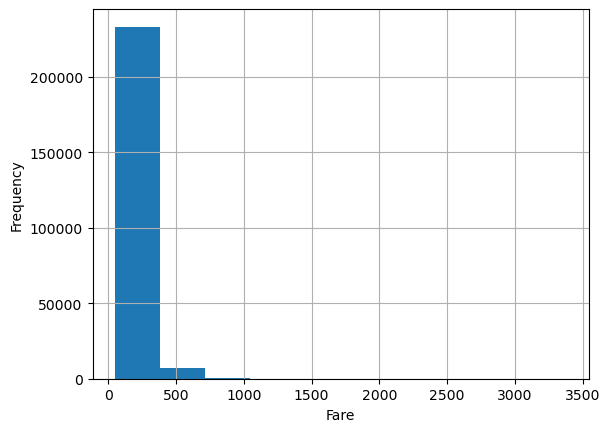

In [6]:
#Distribution of ticket price in the dataset
airport_data['fare'].hist()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

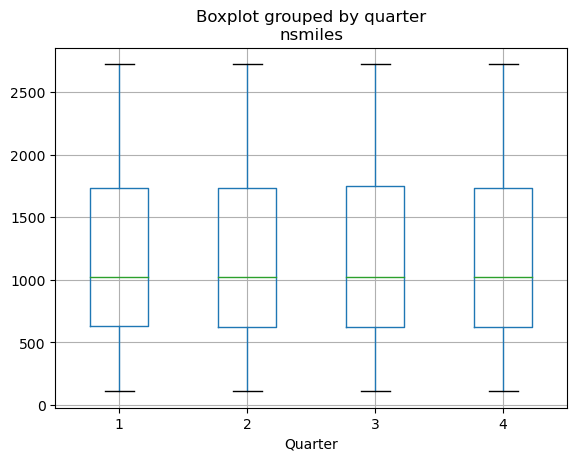

In [7]:
#Box Plot for miles travelled based on quarter
airport_data.boxplot(column='nsmiles',by='quarter')
plt.xlabel("Miles Travelled")
plt.xlabel("Quarter")
plt.show()

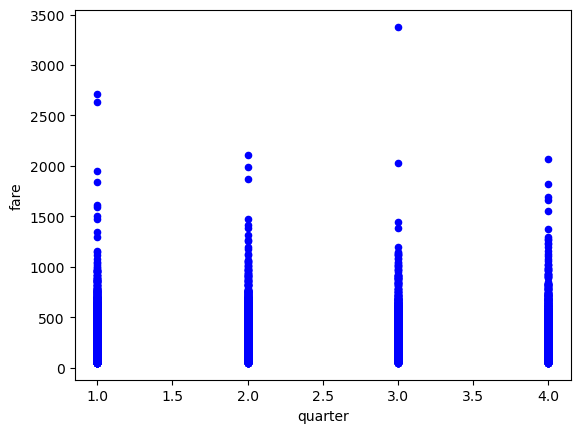

In [8]:
#Scatter plot for fare based on quarter
airport_data.plot(kind='scatter',x='quarter',y='fare',color='blue')
plt.show()

In [9]:
# rows of the dataset
airport_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,...,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl,Geocoded_City1,Geocoded_City2,tbl1apk
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,...,G4,1.00,81.43,G4,1.00,81.43,Table1a,0,0,202131013514112ABEPIE
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,...,DL,0.47,219.98,UA,0.12,154.11,Table1a,0,0,202131013515304ABETPA
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,...,WN,1.00,184.44,WN,1.00,184.44,Table1a,0,0,202131014011259ABQDAL
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,...,AA,0.98,183.09,AA,0.98,183.09,Table1a,0,0,202131014011298ABQDFW
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,...,WN,0.61,184.49,AA,0.39,165.77,Table1a,0,0,202131014014107ABQPHX


In [10]:
X = airport_data.drop(['fare','tbl','tbl1apk','Geocoded_City1','Geocoded_City2'],axis=1)
Y = airport_data.loc[:,'fare']

In [11]:
#Convert the categorical features to dummy variables
city1 = pd.get_dummies(X['city1'],drop_first=True)
city2=pd.get_dummies(X['city2'],drop_first=True)
airport_1=pd.get_dummies(X['airport_1'],drop_first=True)
airport_2=pd.get_dummies(X['airport_2'],drop_first=True)
carrier_lg=pd.get_dummies(X['carrier_lg'],drop_first=True)
carrier_low=pd.get_dummies(X['carrier_low'],drop_first=True)

In [12]:
X.drop(['city1','city2','airport_1','airport_2','carrier_lg','carrier_low'],axis=1,inplace=True)

In [13]:
X = pd.concat([X,city1,city2,airport_1,airport_2,carrier_lg,carrier_low],axis=1)

In [25]:
pca = PCA(n_components=6)

x_transformed=pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9986452317338264

In [26]:
x_transformed

array([[ -245.83090531, -3001.05474611,  -236.57975889,   -36.85337267,
         -153.18844771,  -117.57680968],
       [  584.46431082, -3456.73742996,   437.2781436 ,   149.72565741,
         -282.40943385,  -329.20643604],
       [-3797.29784156,  -938.91299451,   369.20807684,   152.29595519,
         -264.49585386,  -230.48867055],
       ...,
       [ 2392.02930821,  3822.18053402,    48.38454122, -1749.42806419,
         -789.38349596,  -195.79355931],
       [ 3303.85896725,  3277.77425858,   -60.13995968, -1748.2169147 ,
        -1088.54304775,    25.80318053],
       [ 4136.86113204,  2822.15004361,   611.78398357, -1567.28494794,
        -1190.33984854,  -268.70939084]])

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size=0.20,random_state=50)

In [28]:
#Linear Regression model
lreg_mdl1 = LinearRegression()
lreg_mdl1.fit(X_train, Y_train)
Y_prdct1 = lreg_mdl1.predict(X_test)
print("Linear regression model MAE equals ->",mean_absolute_error(Y_test, Y_prdct1))
print("Linear regression model RMSE equals->",np.sqrt(mean_squared_error(Y_test, Y_prdct1)))
print("Linear regression model r-squared score equals->",r2_score(Y_test, Y_prdct1))

Linear regression model MAE equals -> 11.601716144604854
Linear regression model RMSE equals-> 28.005678075000603
Linear regression model r-squared score equals-> 0.8881949165780171


In [29]:
#Random Forest Regression model
rfreg_mdl2 = RandomForestRegressor()
rfreg_mdl2.fit(X_train, Y_train)
Y_prdct2 = rfreg_mdl2.predict(X_test)
print("Random Forest regression model MAE equals ->",mean_absolute_error(Y_test, Y_prdct2))
print("Random Forest regression model RMSE equals->",np.sqrt(mean_squared_error(Y_test, Y_prdct2)))
print("Random Forest regression model r-squared score equals->",r2_score(Y_test, Y_prdct2))

Random Forest regression model MAE equals -> 7.6639772926036995
Random Forest regression model RMSE equals-> 27.02647023653594
Random Forest regression model r-squared score equals-> 0.8958766762087181


In [19]:
#K Nearest Neighbour Regression model
knnreg_mdl3 = neighbors.KNeighborsRegressor(n_neighbors = 3)
knnreg_mdl3.fit(X_train, Y_train)
Y_prdct3 = knnreg_mdl3.predict(X_test)
print("K Nearest Neighbour regression model MAE equals ->",mean_absolute_error(Y_test, Y_prdct3))
print("K Nearest Neighbour regression model RMSE equals->",np.sqrt(mean_squared_error(Y_test, Y_prdct3)))
print("K Nearest Neighbour regression model r-squared score equals->",r2_score(Y_test, Y_prdct3))

K Nearest Neighbour regression model MAE equals -> 13.78535128269199
K Nearest Neighbour regression model RMSE equals-> 34.1152683139632
K Nearest Neighbour regression model r-squared score equals-> 0.8340921451448445


In [20]:
#Decision Tree Regression model
dtreg_mdl4 = DecisionTreeRegressor()
dtreg_mdl4.fit(X_train, Y_train)
Y_prdct4 = dtreg_mdl4.predict(X_test)
print("Decision Tree regression model MAE equals ->",mean_absolute_error(Y_test, Y_prdct4))
print("Decision Tree regression model RMSE equals->",np.sqrt(mean_squared_error(Y_test, Y_prdct4)))
print("Decision Tree regression model r-squared score equals->",r2_score(Y_test, Y_prdct4))

Decision Tree regression model MAE equals -> 10.701156713310013
Decision Tree regression model RMSE equals-> 32.98493116449975
Decision Tree regression model r-squared score equals-> 0.8449040241760211
